In [1]:
import sys
import pandas as pd
import pickle
from AMLpp.transformers import *
from AMLpp.conveyor import *
from AMLpp.architect import *

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\analytic6\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\analytic6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_excel('test.xlsx')

In [10]:
from experiments.exp1.user_transform import UserTransform
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import numpy as np

categorical_columns = ['organization_type_other', 'position_other', 'email', 'ceduc', 'family', 'sstate', 'cgrag', 'income_source_id',
                      'income_frequency_id', 'has_prior_employment', 'empoyees_count_id', 'organization_branch_id', 'organization_type_id', 'position_id',
                      'employment_type_id', 'has_movables', 'has_immovables', 'fact_addr_owner_type_id', 'fact_addr_region_id', 'fact_addr_same', 'addr_owner_type_id',
                      'addr_region_id', 'education_id', 'children_count_id', 'marital_status_id', 'gender_id', 
                      'country_det','city_det', 'region_det', 'isp', 'browser', 'system', 'brand'
                      ]

model = Conveyor (
                  UserTransform(),
                  Word2Vectorization(columns=['purpose_other'], epochs = 100),
                  CategoricalEncoder(columns=categorical_columns),
                  ImputerIterative(),
                  estimator =  LGBMRegressor(
                                            cat_smooth=23, colsample_bytree=0.85, learning_rate=0.005,
                                            max_depth=10, min_child_samples=17, num_leaves=237,
                                            random_state=42, reg_alpha=0.0014249285905021153,
                                            reg_lambda=0.007253299932166387, subsample=0.7
                                             ) 
                  )

In [11]:
X_train,  X_test, Y_train, Y_test = train_test_split(df, df, test_size = 0.1, random_state=42)

In [12]:
model.fit_model(
    X_train, Y_train,
    X_test, Y_test,
    tpot_params = {"generations":1, "population_size":5, "n_jobs":-1},
    categorical_columns = categorical_columns,
    lgb_params = {'n_trials':50},
    rating_func='roc_auc_scor')

100%|██████████| 4/4 [00:01<00:00,  3.06it/s, transform=ImputerIterative]


start fit lgb model !!!!
<function roc_auc_score at 0x0000025DD387AE50>
0.8
<function roc_auc_score at 0x0000025DD387AE50>
0.79
<function roc_auc_score at 0x0000025DD387AE50>
0.5
<function roc_auc_score at 0x0000025DD387AE50>
0.5
<function roc_auc_score at 0x0000025DD387AE50>
0.8099999999999999
<function roc_auc_score at 0x0000025DD387AE50>
0.87
<function roc_auc_score at 0x0000025DD387AE50>
0.5
<function roc_auc_score at 0x0000025DD387AE50>
0.78
<function roc_auc_score at 0x0000025DD387AE50>
0.74
<function roc_auc_score at 0x0000025DD387AE50>
0.5
<function roc_auc_score at 0x0000025DD387AE50>
0.5
<function roc_auc_score at 0x0000025DD387AE50>
0.76
<function roc_auc_score at 0x0000025DD387AE50>
0.74
<function roc_auc_score at 0x0000025DD387AE50>
0.76
<function roc_auc_score at 0x0000025DD387AE50>
0.5
<function roc_auc_score at 0x0000025DD387AE50>
0.87
<function roc_auc_score at 0x0000025DD387AE50>
0.5
<function roc_auc_score at 0x0000025DD387AE50>
0.5
<function roc_auc_score at 0x00000

KeyboardInterrupt: 

In [9]:
model.fit(X_train, Y_train)

100%|██████████| 4/4 [00:01<00:00,  3.71it/s, transform=ImputerIterative]


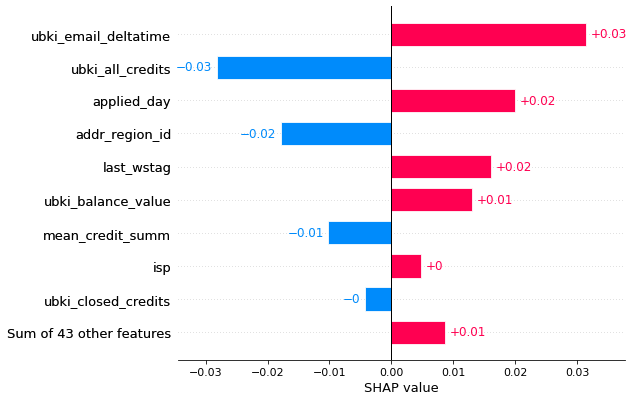

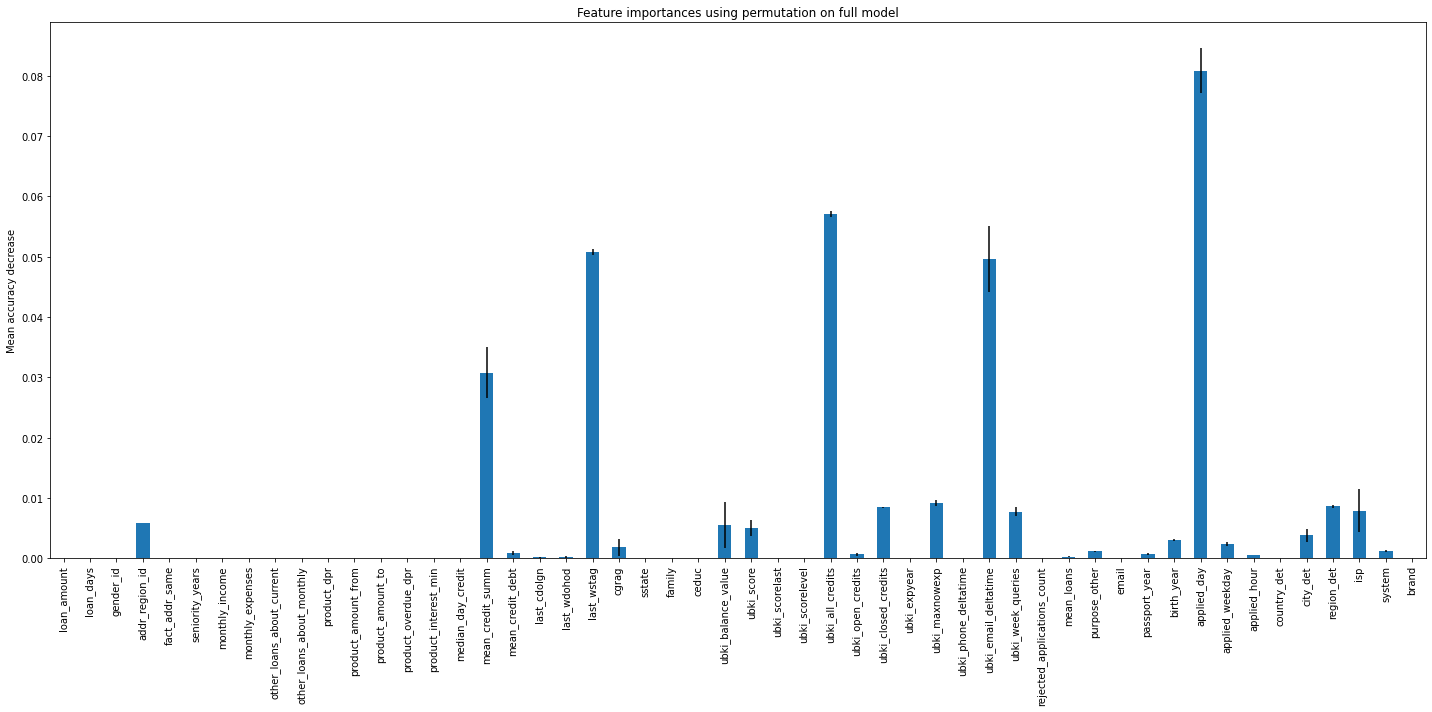

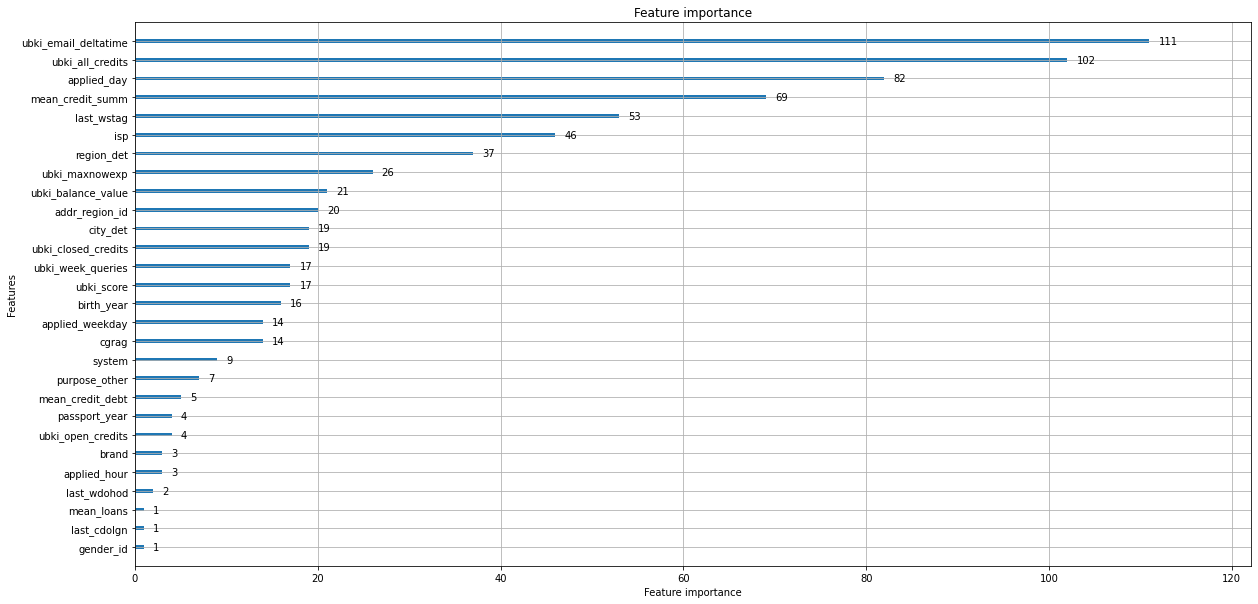

In [10]:
model.feature_importances(df, df)

In [179]:
model.fit(df, df)

100%|██████████| 4/4 [00:01<00:00,  3.18it/s, transform=ImputerIterative]


In [12]:
experiment = Experimenter("exp3")

In [13]:
description = \
"""
Иморт user_transform из __main__
Расширенная модель для новых пользователей, использует только статус 5 и 6.
Расширения подразумевает исользование user_agent, detection.
"""
testset_name = 'testset_2_5k_y2021_m6_new'
X_test_features = ['backend_application_id', 'overdue_days','status_id']
experiment.create_experiment(model, description, 'test', df, df, testset_name, X_test_features = X_test_features, feature_importances = False)


************************************************************
testset = testset_2_5k_y2021_m6_new
function - roc_auc_score = 0.9469000000000001
function - r2_score = 0.24671058765917608
function - accuracy_score = ERROR: Classification metrics can't handle a mix of binary and continuous targets



In [56]:
experiment.make_experiment(X_test, y_test, testset_name, X_test_features = X_test_features)

NameError: name 'X_test' is not defined

In [8]:
from sklearn.metrics import r2_score

from lightgbm import LGBMRegressor

from typing import List

import pandas as pd
import optuna

class LGBOptimizer(object):
    def __init__(self):
        pass
    def __call__(self, trial):
        x = trial.suggest_int('x', 1, 10)
        return trial.number

In [9]:
study = optuna.create_study(direction='maximize')
study.optimize(LGBOptimizer(), n_trials = 20)

[I 2021-07-20 09:51:19,104] A new study created in memory with name: no-name-67b8554e-09c2-4fe2-acde-349b2ab4b5b7
[I 2021-07-20 09:51:19,108] Trial 0 finished with value: 0.0 and parameters: {'x': 3}. Best is trial 0 with value: 0.0.
[I 2021-07-20 09:51:19,113] Trial 1 finished with value: 1.0 and parameters: {'x': 1}. Best is trial 1 with value: 1.0.
[I 2021-07-20 09:51:19,115] Trial 2 finished with value: 2.0 and parameters: {'x': 10}. Best is trial 2 with value: 2.0.
[I 2021-07-20 09:51:19,117] Trial 3 finished with value: 3.0 and parameters: {'x': 2}. Best is trial 3 with value: 3.0.
[I 2021-07-20 09:51:19,119] Trial 4 finished with value: 4.0 and parameters: {'x': 2}. Best is trial 4 with value: 4.0.
[I 2021-07-20 09:51:19,124] Trial 5 finished with value: 5.0 and parameters: {'x': 6}. Best is trial 5 with value: 5.0.
[I 2021-07-20 09:51:19,125] Trial 6 finished with value: 6.0 and parameters: {'x': 8}. Best is trial 6 with value: 6.0.
[I 2021-07-20 09:51:19,127] Trial 7 finished 